# Predicting used cars prices using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the right price for a used car, to potentially help people who are looking to buy one not to overpay for it

The following approach will be taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

This approach is itertive and it is possible at any point to go back and work further on a prevouis step in the process.

## 1. Problem Definition
In a statment
> Given the details and specs of a used car, is it possible to predict a fair price for it?

## 2. Data
The dataset that came from Kaggle but originally it was scraped off Craigslist  
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data

# 3. Evaluation
> The model's effectiveness can be assessed through various metrics such as RMSE (Root Mean Squared Error), RMSLE (Root Mean Squared Log Error), MAE (Mean Absolute Error), R-squared etc. the model results will be considered good if it is able to accurately predict used cars prices within a 10% error margin.

# 4. Features
**Data Dictionary**:
1. **id** - entry id
2. **url** - kisting URL
3. **region** - Craigslist region
4. **region_url** - region URL
5. **price** - entry price in Dollars
6. **year** - manufacturing year
7. **manufacturer** - manufacturer of vehicle
8. **model** - model of vehicle
9. **condition** - condition of vehecle
10. **cylinders** - number of cylinders
11. **fuel** - fuel type
12. **odometer** - miles travled by vehicle
13. **title_status** - title status of vehicle
14. **transmission** - transmission of vehicle
15. **VIN** - vehicle identification number
16. **drive** - type of drive 
17. **size** - size of vehicle
18. **type** - generic type of vehicle
19. **paint_color** - color of vehicle
20. **image_url** - vehicle image URL
21. **description** - listed description of vehicle
22. **county** - useless column left in by mistake **(will be dropped)**
23. **state** - state of listing
24. **lat** - latitude of listing
25. **long** - longitude of listing
26. **posting_date** - date of listing

## Importing the required tools

In [1]:
%matplotlib inline 
# Make plots appear inside the notebook

# EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
import sklearn

# Model evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

## Exploratory Data Analysis (EDA)

In [2]:
# Import the dataset
df = pd.read_csv("data/vehicles.csv", low_memory=False, parse_dates=["year"])

### Check columns, column types and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   url           426880 non-null  object        
 2   region        426880 non-null  object        
 3   region_url    426880 non-null  object        
 4   price         426880 non-null  int64         
 5   year          425675 non-null  datetime64[ns]
 6   manufacturer  409234 non-null  object        
 7   model         421603 non-null  object        
 8   condition     252776 non-null  object        
 9   cylinders     249202 non-null  object        
 10  fuel          423867 non-null  object        
 11  odometer      422480 non-null  float64       
 12  title_status  418638 non-null  object        
 13  transmission  424324 non-null  object        
 14  VIN           265838 non-null  object        
 15  drive         296

### Check a sample of rows

In [4]:
df.sample(20).T

,307193,30131,143500,395317,48089,395649,424907,188891,263178,29881,44291,331485,217078,204827,332210,408507,38223,343253,189914,189521
id,7306688938,7316518584,7309881792,7304338657,7303714492,7302623894,7307457333,7305738711,7308480148,7316850603,7314971550,7312170296,7305107458,7307621479,7302231051,7316720619,7310930385,7307039209,7315222255,7306244428
url,https://oklahomacity.craigslist.org/ctd/d/okla...,https://inlandempire.craigslist.org/ctd/d/los-...,https://peoria.craigslist.org/ctd/d/morton-201...,https://norfolk.craigslist.org/ctd/d/chesapeak...,https://redding.craigslist.org/ctd/d/proberta-...,https://norfolk.craigslist.org/cto/d/portsmout...,https://milwaukee.craigslist.org/ctd/d/dolton-...,https://capecod.craigslist.org/cto/d/harwich-1...,https://santafe.craigslist.org/cto/d/santa-fe-...,https://inlandempire.craigslist.org/ctd/d/anah...,https://palmsprings.craigslist.org/ctd/d/palm-...,https://allentown.craigslist.org/ctd/d/paterso...,https://rmn.craigslist.org/ctd/d/eau-claire-20...,https://kalamazoo.craigslist.org/ctd/d/comstoc...,https://allentown.craigslist.org/ctd/d/easton-...,https://seattle.craigslist.org/see/cto/d/seatt...,https://modesto.craigslist.org/ctd/d/sacrament...,https://providence.craigslist.org/ctd/d/methue...,https://westernmass.craigslist.org/ctd/d/verno...,https://southcoast.craigslist.org/cto/d/dennis...
region,oklahoma city,inland empire,peoria,norfolk / hampton roads,redding,norfolk / hampton roads,milwaukee,cape cod / islands,santa fe / taos,inland empire,palm springs,lehigh valley,rochester,kalamazoo,lehigh valley,seattle-tacoma,modesto,rhode island,western massachusetts,south coast
region_url,https://oklahomacity.craigslist.org,https://inlandempire.craigslist.org,https://peoria.craigslist.org,https://norfolk.craigslist.org,https://redding.craigslist.org,https://norfolk.craigslist.org,https://milwaukee.craigslist.org,https://capecod.craigslist.org,https://santafe.craigslist.org,https://inlandempire.craigslist.org,https://palmsprings.craigslist.org,https://allentown.craigslist.org,https://rmn.craigslist.org,https://kalamazoo.craigslist.org,https://allentown.craigslist.org,https://seattle.craigslist.org,https://modesto.craigslist.org,https://providence.craigslist.org,https://westernmass.craigslist.org,https://southcoast.craigslist.org
price,34990,17500,17960,30590,14995,4000,1400,39995,5800,0,29900,13695,22950,15997,15990,19999,7798,11995,16995,6000
year,2018-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2020-01-01 00:00:00,2015-01-01 00:00:00,2006-01-01 00:00:00,2005-01-01 00:00:00,1967-01-01 00:00:00,2012-01-01 00:00:00,2019-01-01 00:00:00,2011-01-01 00:00:00,2009-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2016-01-01 00:00:00,2018-01-01 00:00:00,2013-01-01 00:00:00,2010-01-01 00:00:00,2015-01-01 00:00:00,1998-01-01 00:00:00
manufacturer,audi,ford,chevrolet,chevrolet,toyota,toyota,honda,chevrolet,dodge,ford,mercedes-benz,ford,bmw,chevrolet,NaN,toyota,ford,cadillac,subaru,NaN
model,a5 premium plus sedan 4d,transit 150,traverse,silverado 1500 regular,prius hatchback,avalon,odyssey,chevelle,avenger se,mustang,e 550,f-250,x5 xdrive35i awd luxury suv,cruze,Scion iM Hatchback 4D,prius c hatchback,focus,dts platinum,forester limited,98 Jag XJ8
condition,good,excellent,good,good,NaN,good,NaN,NaN,excellent,NaN,excellent,NaN,NaN,NaN,good,like new,excellent,excellent,excellent,excellent
cylinders,NaN,6 cylinders,NaN,8 cylinders,NaN,6 cylinders,NaN,NaN,6 cylinders,NaN,8 cylinders,NaN,NaN,4 cylinders,NaN,4 cylinders,NaN,8 cylinders,4 cylinders,8 cylinders


### Check number of rows

In [5]:
# Number of rows in the dataset
len(df)

426880

### Describe numerical columns

In [6]:
pd.options.display.float_format = "{:.2f}".format

df[["price", "odometer"]].describe()

,price,odometer
count,426880.00,422480.00
mean,75199.03,98043.33
std,12182282.17,213881.50
min,0.00,0.00
25%,5900.00,37704.00
50%,13950.00,85548.00
75%,26485.75,133542.50
max,3736928711.00,10000000.00


**From the above table the price column has a min of 0, max of over 3 and half billion, and a mean of 75 thousand**  
**The odometer on the other hand has a min of 0, max of 10 million miles, and a mean of 98 thousand**

### Check number of null values per column

In [7]:
# Amount on null values for each column
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

As can be seen in the prevouis cell, the county column is entirly empty, so it will be droped

### Drop county column

In [8]:
df.drop("county", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   url           426880 non-null  object        
 2   region        426880 non-null  object        
 3   region_url    426880 non-null  object        
 4   price         426880 non-null  int64         
 5   year          425675 non-null  datetime64[ns]
 6   manufacturer  409234 non-null  object        
 7   model         421603 non-null  object        
 8   condition     252776 non-null  object        
 9   cylinders     249202 non-null  object        
 10  fuel          423867 non-null  object        
 11  odometer      422480 non-null  float64       
 12  title_status  418638 non-null  object        
 13  transmission  424324 non-null  object        
 14  VIN           265838 non-null  object        
 15  drive         296

### Check the date columns types

In [9]:
df['posting_date'].dtype, df['year'].dtype

(dtype('O'), dtype('<M8[ns]'))

### Check the `posting_date` column format

In [10]:
df['posting_date']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426880, dtype: object

### Transform `posting_date` to datetime and remove last 5 characters

In [11]:
df['posting_date'] = pd.to_datetime(df['posting_date'].str[:-6], format='%Y-%m-%dT%H:%M:%S')

### Check a sample of rows

In [12]:
df.sample(40)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
148025,7314270801,https://stlouis.craigslist.org/ctd/d/east-sain...,"st louis, MO",https://stlouis.craigslist.org,4500,1996-01-01,ram,2500,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01212_dgqiLsIDHb...,We have a 1996 Dodge Ram 2500 for sale with ho...,il,38.67,-90.08,2021-04-29 08:36:05
394974,7306194815,https://norfolk.craigslist.org/ctd/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,4995,2012-01-01,fiat,500,excellent,NaN,...,fwd,NaN,hatchback,red,https://images.craigslist.org/00z0z_hS74zgIHGn...,ASK FOR MANNY TO GET THIS SPECIAL PRICE!!! Re...,va,36.84,-76.15,2021-04-13 12:15:02
324227,7316310131,https://portland.craigslist.org/mlt/ctd/d/port...,portland,https://portland.craigslist.org,35666,2019-01-01,bmw,3 series,NaN,4 cylinders,...,4wd,NaN,sedan,NaN,https://images.craigslist.org/00606_eCy25awHZT...,Beaverton INFINITI STOCK #: P7994 ...,or,45.49,-122.77,2021-05-03 10:50:00
294066,7307232735,https://cleveland.craigslist.org/ctd/d/clevela...,cleveland,https://cleveland.craigslist.org,16589,2018-01-01,subaru,impreza 2.0i,good,NaN,...,NaN,NaN,sedan,silver,https://images.craigslist.org/00D0D_kOqiMWMtiq...,Offered by: Ganley ChevroletStock# 5760CPWCall...,oh,41.42,-81.78,2021-04-15 12:21:00
247469,7315055483,https://lasvegas.craigslist.org/ctd/d/las-vega...,las vegas,https://lasvegas.craigslist.org,11798,2012-01-01,nissan,frontier,NaN,6 cylinders,...,rwd,compact,pickup,blue,https://images.craigslist.org/00o0o_jm31vYcYu4...,➥ You can immediately confirm availability of...,nv,36.14,-115.23,2021-04-30 15:07:01
202440,7306748485,https://grandrapids.craigslist.org/ctd/d/caled...,grand rapids,https://grandrapids.craigslist.org,10490,2015-01-01,chevrolet,equinox,NaN,4 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00z0z_76xEf1E51u...,Here is a 2015 Chevy Equinox LT powered by a f...,mi,42.78,-85.51,2021-04-14 13:10:04
250019,7314636169,https://cnj.craigslist.org/ctd/d/new-brunswick...,central NJ,https://cnj.craigslist.org,10995,2011-01-01,jeep,grand cherokee,NaN,NaN,...,4wd,NaN,SUV,black,https://images.craigslist.org/00n0n_6AaZqY5UWF...,2011 Jeep Grand Cherokee 4WD 4dr Laredo Of...,nj,40.48,-74.48,2021-04-29 21:25:00
145757,7309386401,https://carbondale.craigslist.org/ctd/d/murphy...,southern illinois,https://carbondale.craigslist.org,4995,2003-01-01,lincoln,town car,good,NaN,...,rwd,NaN,sedan,NaN,https://images.craigslist.org/00505_ipOFRPPKrV...,2003 Lincoln Town Car Signature 4dr Sedan Seda...,il,37.76,-89.27,2021-04-19 13:30:02
13732,7307423726,https://sierravista.craigslist.org/ctd/d/tucso...,sierra vista,https://sierravista.craigslist.org,10999,2011-01-01,toyota,rav4 sport,good,6 cylinders,...,4wd,NaN,other,silver,https://images.craigslist.org/00k0k_h0Fn0QulNU...,Why Buy From Too Hot Motors?Thank you for taki...,az,32.24,-110.86,2021-04-15 14:30:05
175336,7304692044,https://cenla.craigslist.org/ctd/d/vicksburg-2...,central louisiana,https://cenla.craigslist.org,53700,NaT,NaN,ierra 1500,NaN,8 cylinders,...,4wd,NaN,pickup,grey,https://images.craigslist.org/00O0O_cpIkn2jwHN...,2020 *GMC* *Sierra 1500* SIERRA 1500 AT4 4X4 5...,la,32.33,-90.86,2021-04-10 10:41:04


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            426880 non-null  int64         
 1   url           426880 non-null  object        
 2   region        426880 non-null  object        
 3   region_url    426880 non-null  object        
 4   price         426880 non-null  int64         
 5   year          425675 non-null  datetime64[ns]
 6   manufacturer  409234 non-null  object        
 7   model         421603 non-null  object        
 8   condition     252776 non-null  object        
 9   cylinders     249202 non-null  object        
 10  fuel          423867 non-null  object        
 11  odometer      422480 non-null  float64       
 12  title_status  418638 non-null  object        
 13  transmission  424324 non-null  object        
 14  VIN           265838 non-null  object        
 15  drive         296

### Create a copy of dataframe

In [14]:
df_temp = df.copy()

### Visualize price vs year

In [15]:
plt.style.use('seaborn-v0_8')
plt.rcParams["font.size"] = 50
plt.rcParams["xtick.labelsize"] = 10

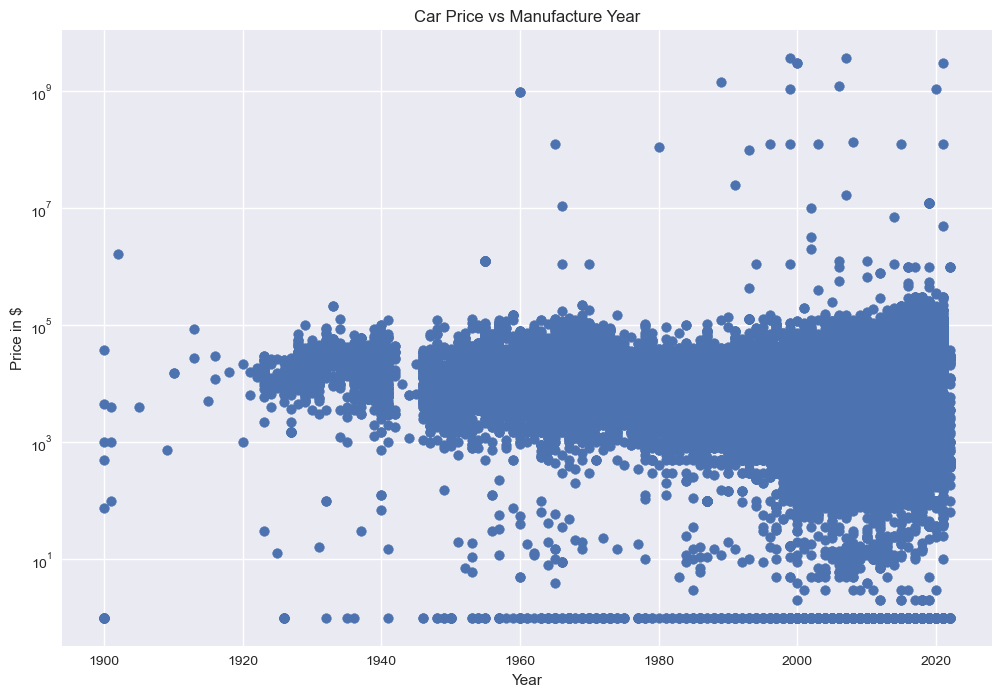

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df['year'], df['price']);
ax.set_yscale('log')

# Customize the plot
ax.set(title="Car Price vs Manufacture Year", xlabel="Year", ylabel='Price in $');

### Visualize price distribution

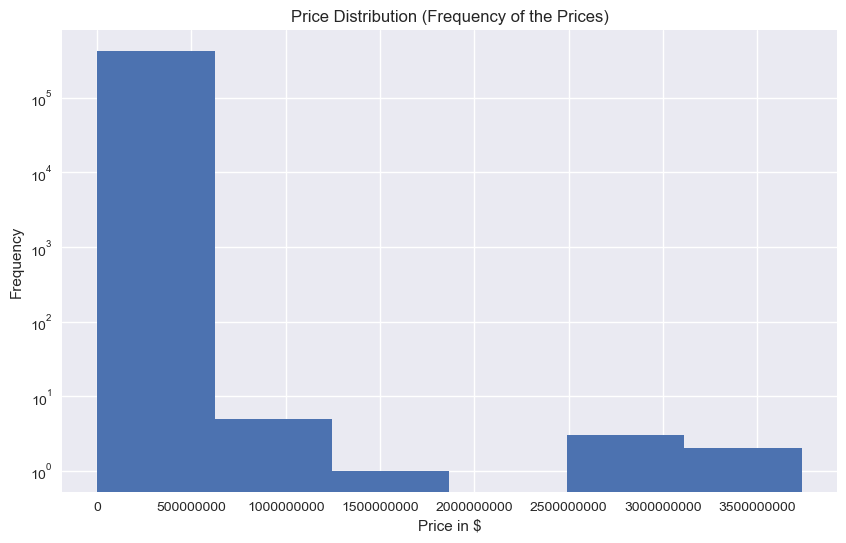

In [17]:
# Plot price distripution
fig, ax = plt.subplots(figsize=(10, 6));
hist = ax.hist(df['price'], bins=6);
plt.ticklabel_format(style = 'plain')

# Customize the plot
ax.set(title="Price Distribution (Frequency of the Prices)", xlabel="Price in $", ylabel='Frequency');
ax.set_yscale('log');

**The figure above shows that most prices are between 0 and 500,000,000. There are some extreme outliers present in the `price` column.**

### Visualize price outliers

In [55]:
def visualizeDistribution(df, column, label):
    """
    Plot the distribution of a spicific column in a dataframe
    """
    # Subplot of distribution
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(35, 30),
                                    sharex=False)

    # Add data to ax0
    red_square = dict(markerfacecolor="lightblue", marker="s")
    ax0.boxplot(df[column], vert=False, flierprops=red_square);
    # Add data to ax1
    ax1.hist(df[column], bins=6);

    # Customize ax0
    ax0.set_title(label="Boxplot ", fontsize=40);
    ax0.set_xlabel(label, fontsize=40)
    ax0.set_xscale('log')
    ax0.tick_params(axis="both", which="major", labelsize=20)

    #ax0.bar_label(fontsize=20)

    # Customize ax1    
    ax1.set_title(label="Histogram ", fontsize=40);
    ax1.set_xlabel(label, fontsize=30)
    ax1.set_yscale('log')
    ax1.set_ylabel("Distribution", fontsize=30);
    ax1.tick_params(axis="both", which="major", labelsize=20)

    # Add a title to the figure
    fig.suptitle("The distribution of " + label, fontsize=50, fontweight="bold");

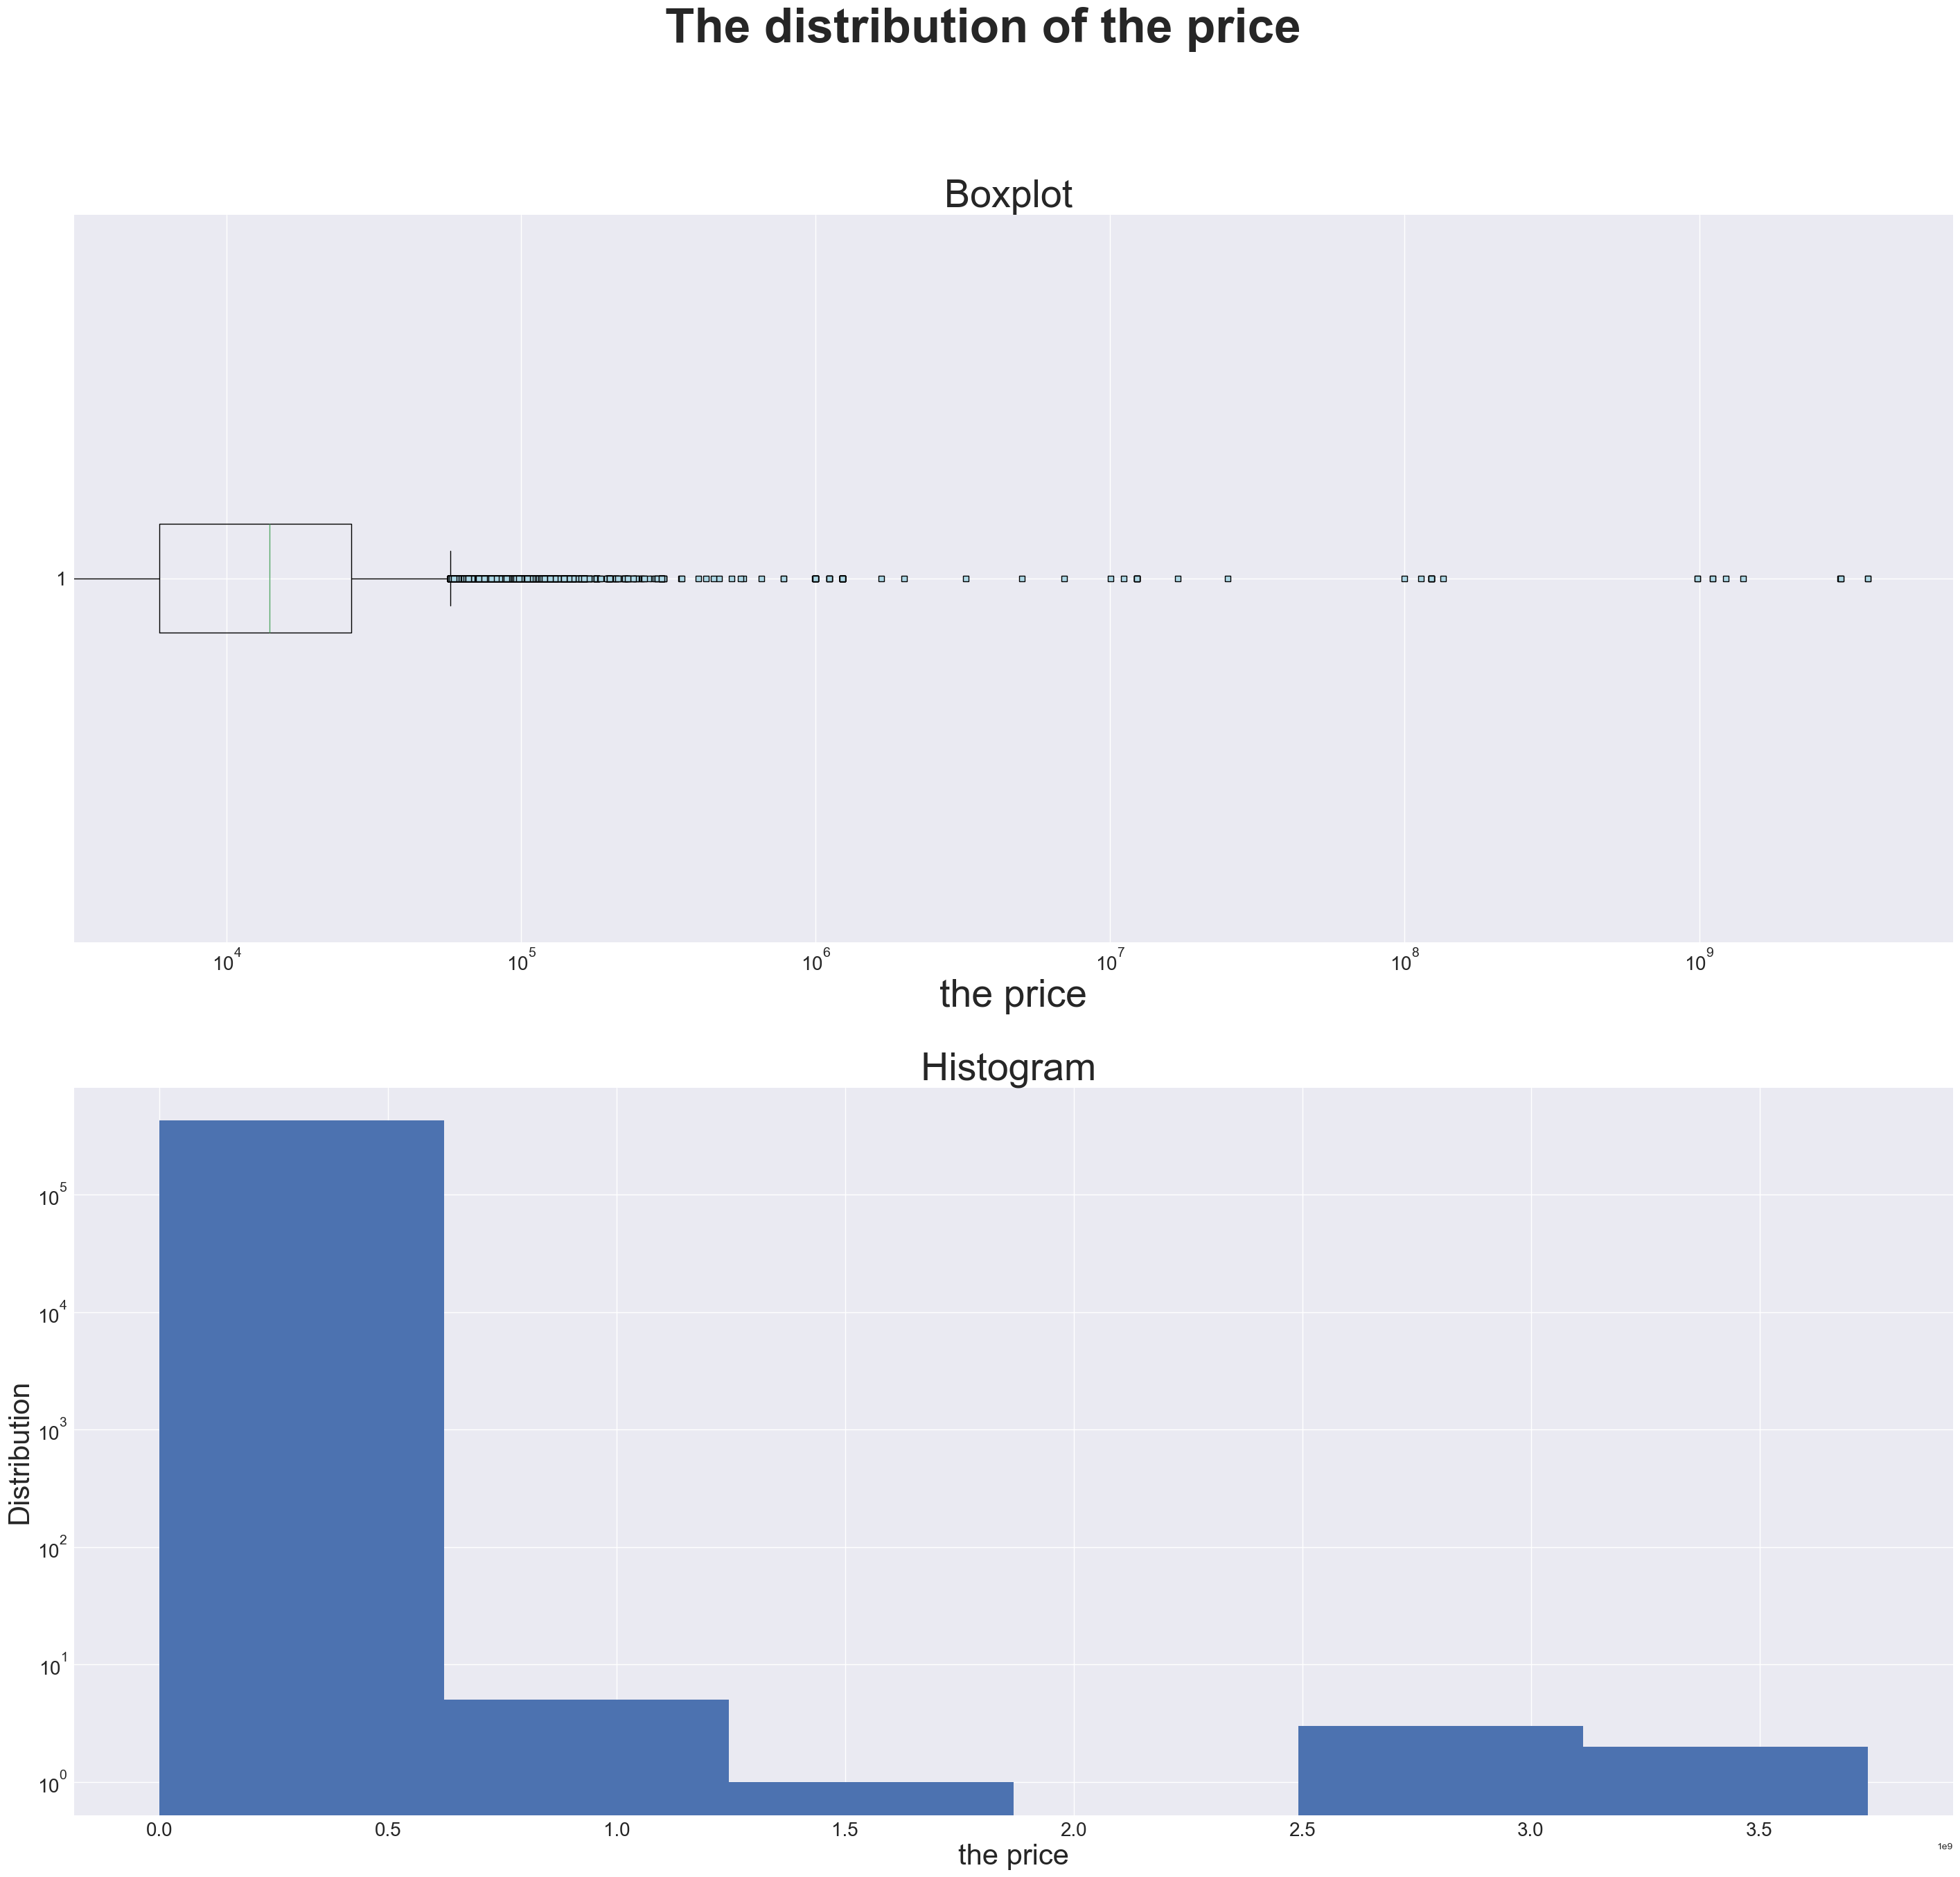

In [56]:
visualizeDistribution(df, "price", "the price")

**As suspected, there are many extreme outliers in the `price` column (target).**

In [20]:
# df["posting_year"] = df.posting_date.dt.year.astype(int)
# df["posting_month"] = df.posting_date.dt.month.astype(int)
# df["posting_day"] = df.posting_date.dt.day.astype(int)
# df["posting_day_of_week"] = df.posting_date.dt.dayofweek.astype(int)

In [21]:
# More visualization to do

# Odometer vs Price
# Fuel vs Price
# All vs Price

# Number of cars per Region (Bar)
# Number of cars per State
# Number of cars per Manufa
# Number of cars per Model
# Number of cars per Drive
# Number of cars per Trans
# Number of cars per Type
# Number of cars per Condition
# Number of cars per Cylinder
# Number of cars for each Fuel type (Bar, Pie)
# Number of cars per Size

# Something with Color

### Get a sample of the data

In [22]:
df_temp.sample(10).T

,313536,55990,300290,221015,92801,323031,295379,349419,139038,86762
id,7307729181,7315482862,7302141493,7313730412,7310398372,7316704722,7315964507,7314283898,7310152193,7311123189
url,https://bend.craigslist.org/ctd/d/bend-2018-fo...,https://sandiego.craigslist.org/nsd/ctd/d/esco...,https://limaohio.craigslist.org/ctd/d/saint-ma...,https://loz.craigslist.org/ctd/d/camdenton-200...,https://daytona.craigslist.org/cto/d/palm-coas...,https://portland.craigslist.org/clc/ctd/d/glad...,https://columbus.craigslist.org/cto/d/lancaste...,https://myrtlebeach.craigslist.org/cto/d/myrtl...,https://twinfalls.craigslist.org/ctd/d/boise-2...,https://newhaven.craigslist.org/ctd/d/north-br...
region,bend,san diego,lima / findlay,lake of the ozarks,daytona beach,portland,columbus,myrtle beach,twin falls,new haven
region_url,https://bend.craigslist.org,https://sandiego.craigslist.org,https://limaohio.craigslist.org,https://loz.craigslist.org,https://daytona.craigslist.org,https://portland.craigslist.org,https://columbus.craigslist.org,https://myrtlebeach.craigslist.org,https://twinfalls.craigslist.org,https://newhaven.craigslist.org
price,34592,17999,26996,4995,4200,15995,29900,14900,3495,5900
year,2018-01-01 00:00:00,2016-01-01 00:00:00,2015-01-01 00:00:00,2005-01-01 00:00:00,2007-01-01 00:00:00,2013-01-01 00:00:00,2016-01-01 00:00:00,2015-01-01 00:00:00,2004-01-01 00:00:00,2009-01-01 00:00:00
manufacturer,ford,toyota,ford,ford,ford,bmw,nissan,nissan,mercury,toyota
model,explorer,camry,f-150,expedition,ranger,3 series 328i,titan,frontier,sable,matrix
condition,NaN,NaN,NaN,NaN,good,NaN,good,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,4 cylinders,4 cylinders,6 cylinders,NaN,NaN,4 cylinders


### Visualize number of cars per region

In [23]:
cars_per_region = df_temp['region'].value_counts()
cars_per_region

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

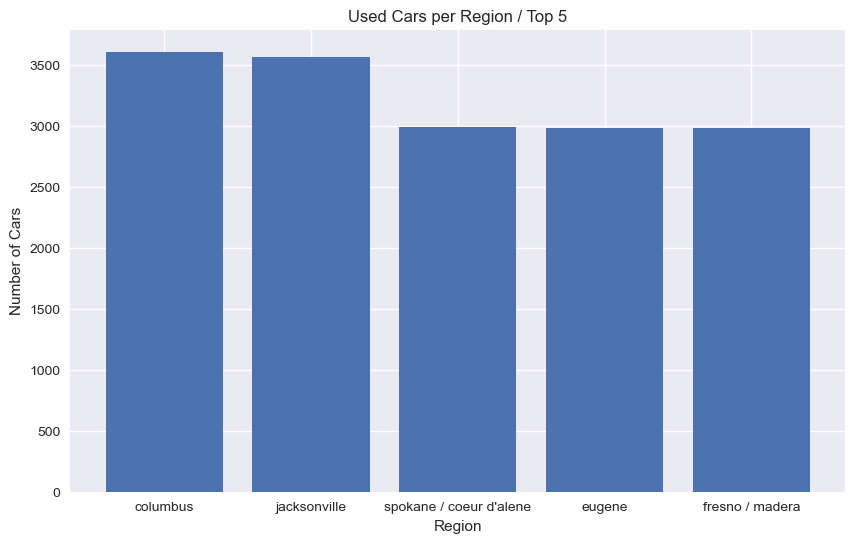

In [24]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_region.index.tolist()[:5], cars_per_region.iloc[:5]);

# Customize the bar
ax.set(title="Used Cars per Region / Top 5", xlabel="Region", ylabel='Number of Cars');

**Columbus, Jacksonville, Spokane/coeur d'alene, Eugene and Fresno/madera are the top 5 regions with the most cars for sale. They each have 3600, 3500, 3000, 3000, 3000 cars offered for sale, respectively.**

### Visualize number of cars per state

In [25]:
cars_per_state = df_temp['state'].value_counts()
cars_per_state

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

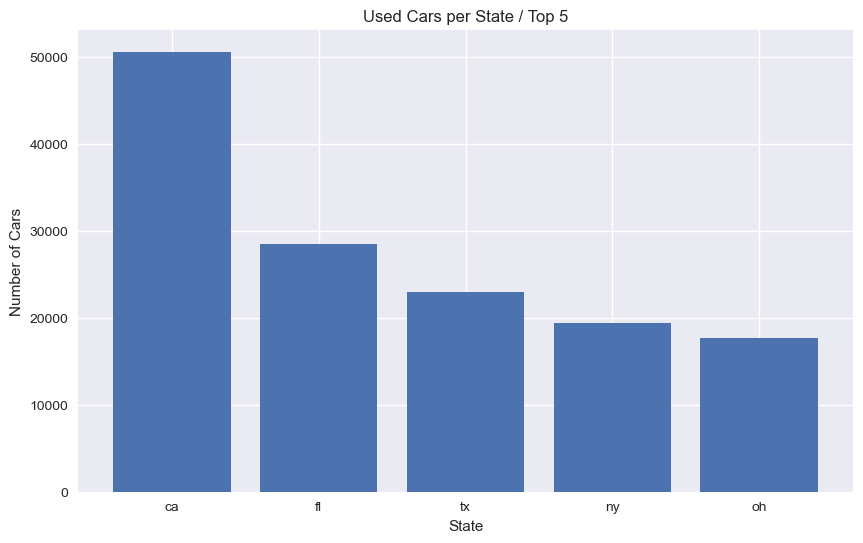

In [26]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_state.index.tolist()[:5], cars_per_state.iloc[:5]);

# Customize the bar
ax.set(title="Used Cars per State / Top 5", xlabel="State", ylabel='Number of Cars');

**California, Florida, Texas, New York, and Ohio are the top 5 states with the most cars for sale. They each have 50000, 28000, 23000, 20000, 17000 cars offered for sale, respectively.**

### Visualize number of cars per Manufacturer

In [27]:
cars_per_manufacturer = df_temp['manufacturer'].value_counts()
cars_per_manufacturer

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

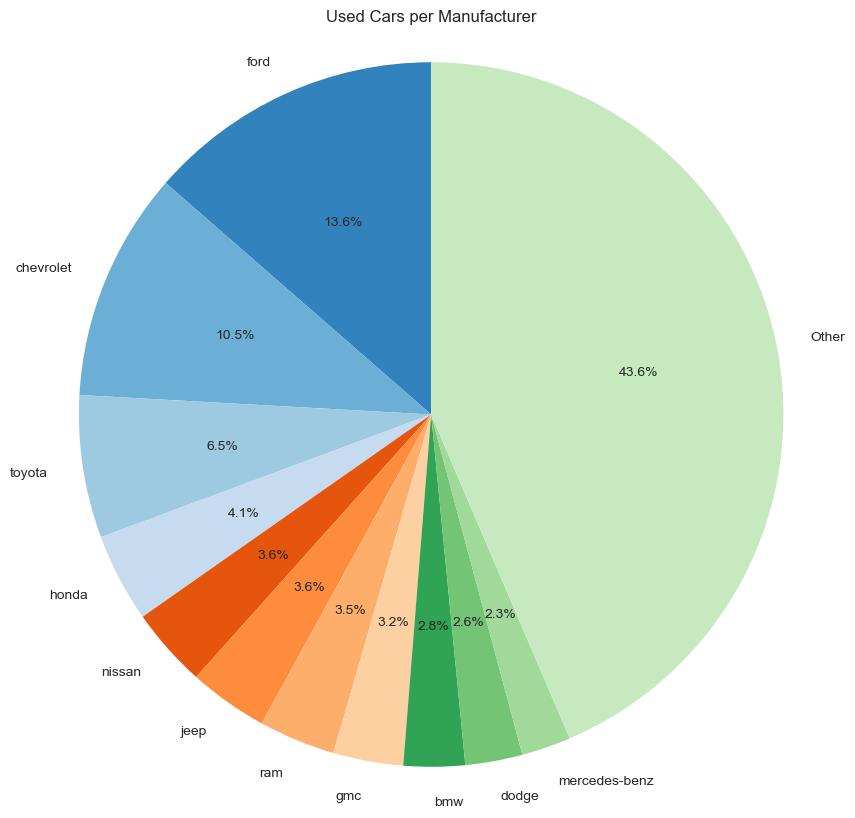

In [28]:
colors = plt.cm.tab20c(np.arange(len(cars_per_manufacturer)))

# Sort data by value
data_sorted = cars_per_manufacturer.sort_values(ascending=False)

# Extract labels and values
labels = data_sorted.index.tolist()
values = data_sorted.values.tolist()

# Group small categories into 'Other'
threshold = 0.05  # Adjust as needed
total = sum(values)
other_value = sum([value for value in values if value / total < threshold])
other_label = 'Other'
labels = labels[:11] + [other_label]
values = values[:11] + [other_value]

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set title
ax.set_title("Used Cars per Manufacturer")

plt.show()

**Ford, Chevrolet, and Toyota have the highest number of cars.**

### Visualize number of cars per Model

In [29]:
combined_model_manufacturer = df_temp.copy()
combined_model_manufacturer["model_manufacturer"] = df_temp["manufacturer"] + " " + df_temp["model"]

cars_per_model = combined_model_manufacturer["model_manufacturer"].value_counts()
cars_per_model

model_manufacturer
ford f-150                  8009
chevrolet silverado 1500    5140
ram 1500                    4069
toyota camry                3133
chevrolet silverado         3021
                            ... 
mitsubishi eclipse gs-t        1
ram 1500 hemi crew             1
ford xlt x-cab                 1
ford f150 fx/2 sport           1
jeep gand wagoneer             1
Name: count, Length: 24169, dtype: int64

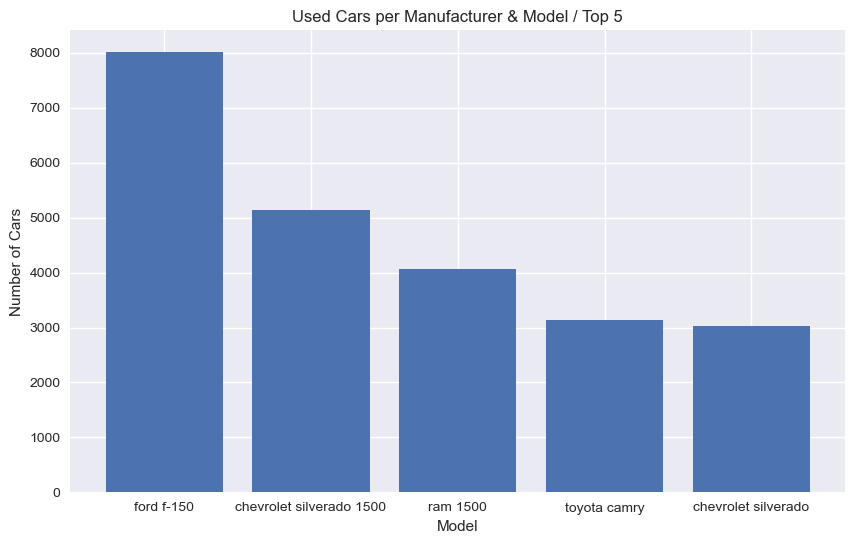

In [30]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_model.index.tolist()[:5], cars_per_model.iloc[:5]);

# Customize the bar
ax.set(title="Used Cars per Manufacturer & Model / Top 5", xlabel="Model", ylabel='Number of Cars');

**Ford f-150 is the most common car model with 8000 cars for sale, followed by Chevrolet silverado 1500 with over 5000 cars and Ram 1500 with over 4000 cars.**

### Get unique models

In [31]:
unique_models = df_temp["model"].unique()

# Print all unique values one by one
for model in unique_models:
    print(model)

nan
sierra 1500 crew cab slt
silverado 1500
silverado 1500 crew
tundra double cab sr
f-150 xlt
sierra 2500 hd extended cab
silverado 1500 double
tacoma
colorado extended cab
corvette grand sport
cherokee
wrangler unlimited sport
silverado 1500 regular
colorado crew cab z71
tacoma access cab pickup
camaro ss coupe 2d
tundra crewmax sr5 pickup
ranger supercrew xl pickup
frontier crew cab pro-4x
compass
f150 super cab xl pickup 4d
tacoma double cab sr5
wrangler sport suv 2d
f150 supercrew cab xlt
1500 regular cab tradesman
mx-5 miata club
ranger supercab xl pickup
xt4 sport suv 4d
f250 super duty
renegade sport suv 4d
f150 regular cab xl pickup
sierra 1500 regular cab
odyssey
1500 quad cab express pickup
sierra 1500 extended cab slt
1500 classic regular cab
mustang gt premium
f450
silverado 1500 ld
tundra double cab pickup
wrangler unlimited sahara
charger rt 4dr sedan
civic si coupe 2d
civic lx sedan 4d
expedition xlt sport
civic ex sedan 4d
tacoma double cab pickup
f150 supercrew cab xl

### Visualize number of Ford cars models

In [32]:
ford_records = df_temp[df_temp['manufacturer'] == "ford"]
ford_models = ford_records["model"].value_counts()
ford_models

model
f-150                                        8009
escape                                       2745
explorer                                     2499
mustang                                      2220
fusion                                       1979
                                             ... 
f-150 crew cab limited                          1
f-550 service truck under deck compressor       1
runabout roadster                               1
f150 fx-2 sport                                 1
f150, platinum                                  1
Name: count, Length: 3874, dtype: int64

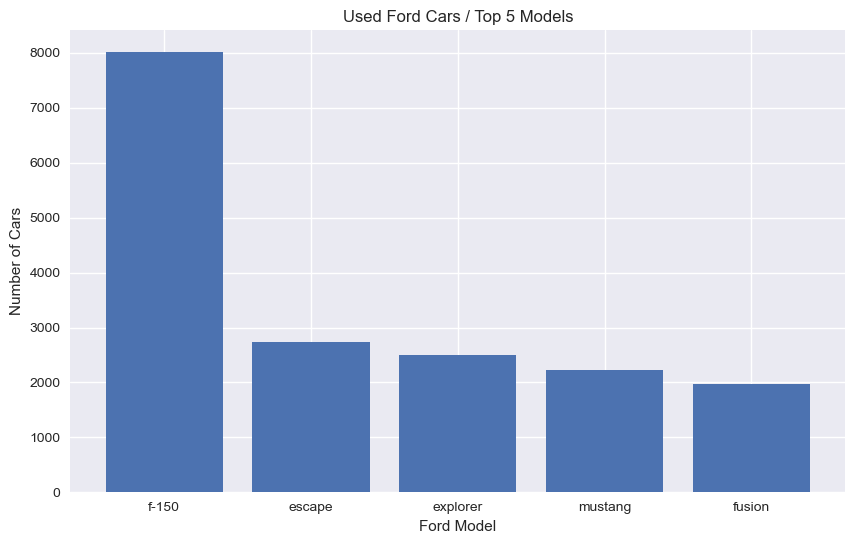

In [33]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(ford_models.index.tolist()[:5], ford_models.iloc[:5]);

# Customize the bar
ax.set(title="Used Ford Cars / Top 5 Models", xlabel="Ford Model", ylabel='Number of Cars');

**The top used Ford cars are f-150, escape, explorer, mustang and fusion.**

### Visualize car price vs odometer

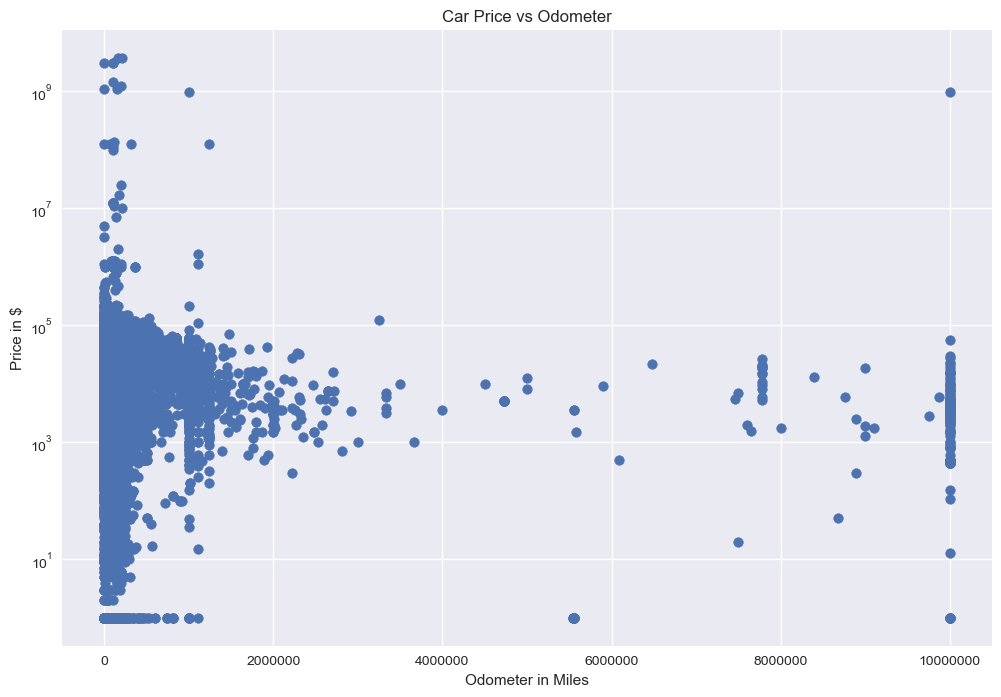

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_temp['odometer'], df_temp['price']);
plt.ticklabel_format(style = 'plain')

# Customize the plot
ax.set(title="Car Price vs Odometer", xlabel="Odometer in Miles", ylabel='Price in $');
ax.set_yscale('log')

**Most cars in the dataset have a price between 0 and 100,000 and an odometer between 0 and 2000,000.**

### Visualize number of cars vs drive

In [35]:
cars_per_drive = df_temp['drive'].value_counts()
cars_per_drive

drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

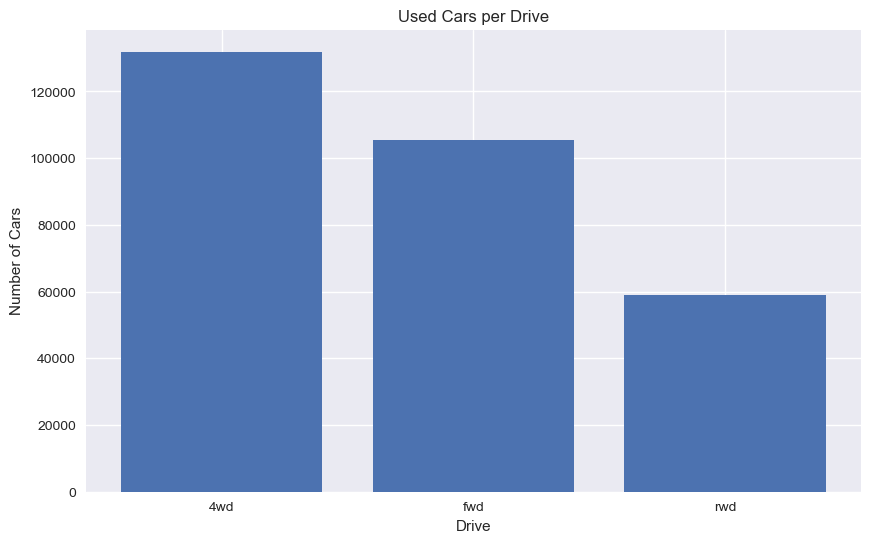

In [36]:
fig, ax = plt.subplots(figsize=(10, 6));
bar = ax.bar(cars_per_drive.index.tolist(), cars_per_drive);

# Customize the bar
ax.set(title="Used Cars per Drive", xlabel="Drive", ylabel='Number of Cars');

**The dataset comprises more than 120,000 cars with four-wheel drive, over 100,000 with front-wheel drive, and approximately 60,000 with rear-wheel drive.**

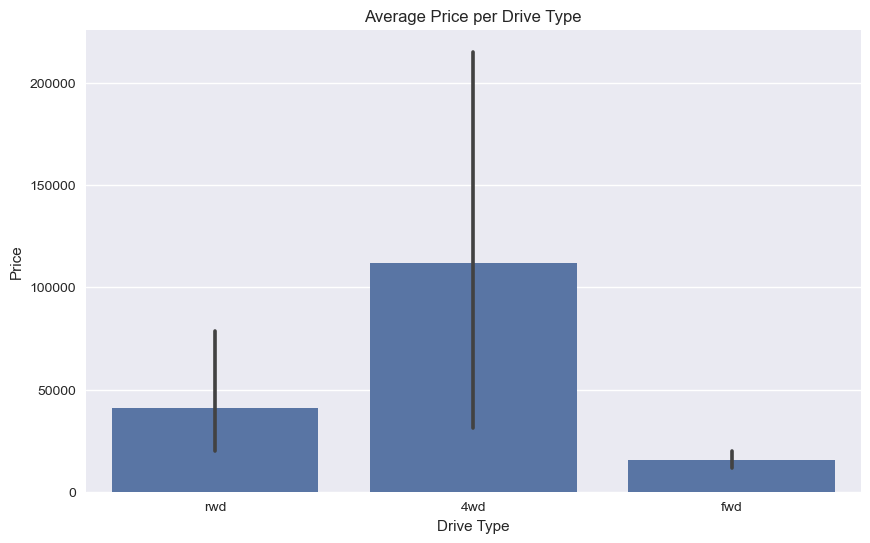

In [37]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='drive', y='price', data=df_temp)
plt.title('Average Price per Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.show()

### Visualize car price vs drive

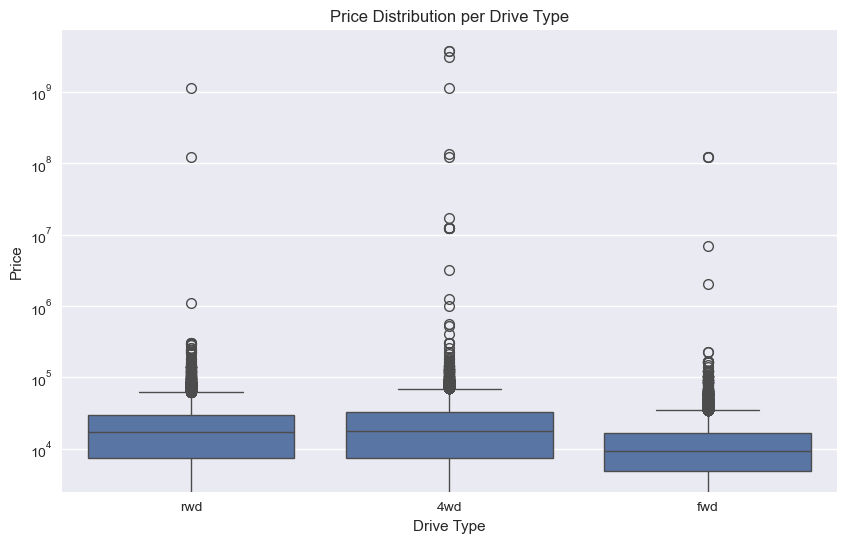

In [38]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='drive', y='price', data=df_temp)
plt.title('Price Distribution per Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price')

ax.set_yscale('log')
plt.show()

**Cars with rear-wheel drive and four-wheel drive are priced between `$8,000` and `$90,000`, whereas front-wheel drive cars are priced in the range of `$5,000` to `$12,000`. 
 There are outliers present in the `price` column.**

### Visualize car price vs transmission

In [39]:
cars_per_transmission = df_temp['transmission'].value_counts()
cars_per_transmission

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

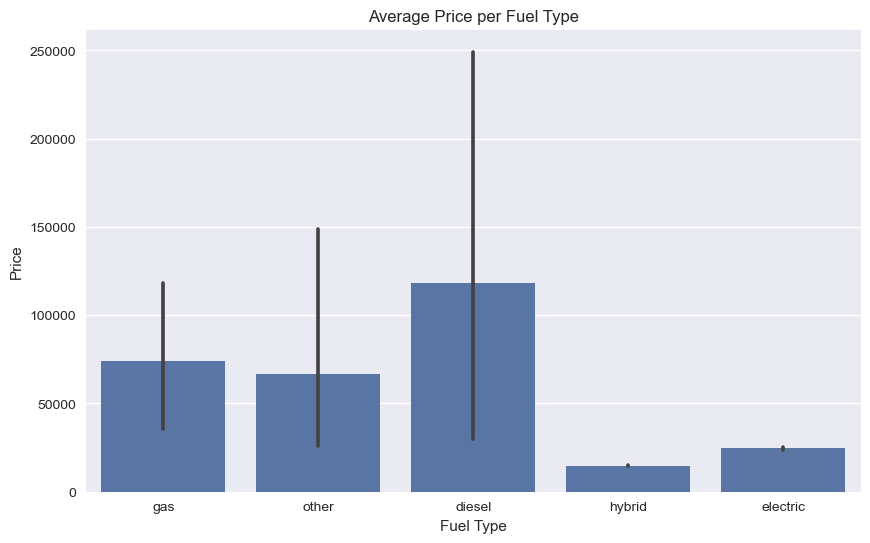

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel', y='price', data=df_temp)
plt.title('Average Price per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

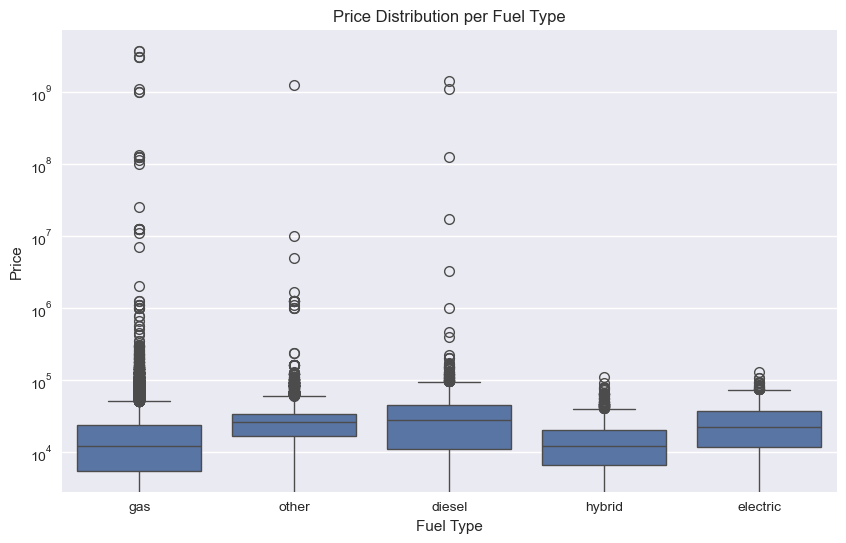

In [41]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='fuel', y='price', data=df_temp)
plt.title('Price Distribution per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
ax.set_yscale('log')
plt.show()

In [42]:
# Scatter plot
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.scatter(df_temp['odometer'], df_temp['price'], c=df_temp["fuel"]);
# plt.ticklabel_format(style = 'plain')

# # Customize the plot
# ax.set(title="Car Price vs Odometer", xlabel="Odometer in Miles", ylabel='Price in $');

df_temp[df_temp['fuel'] == "hybrid"]["price"].median()

11995.0

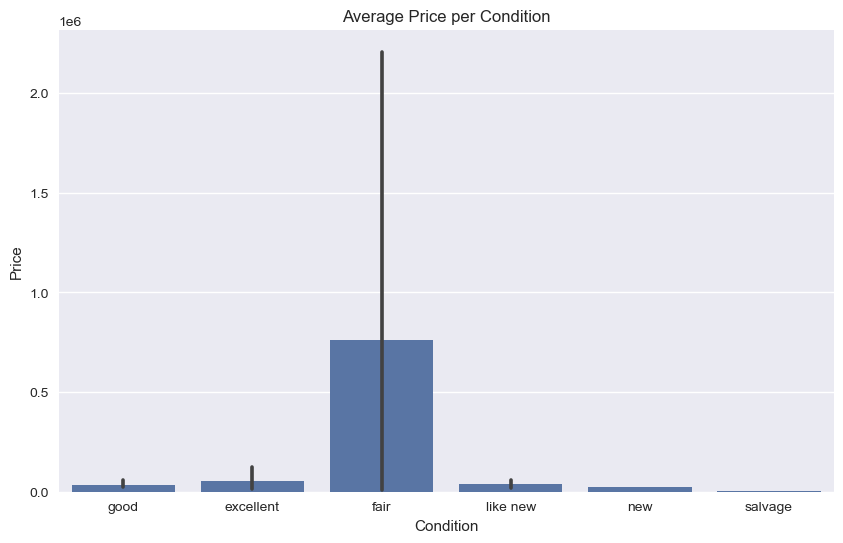

In [43]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=df_temp)
plt.title('Average Price per Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

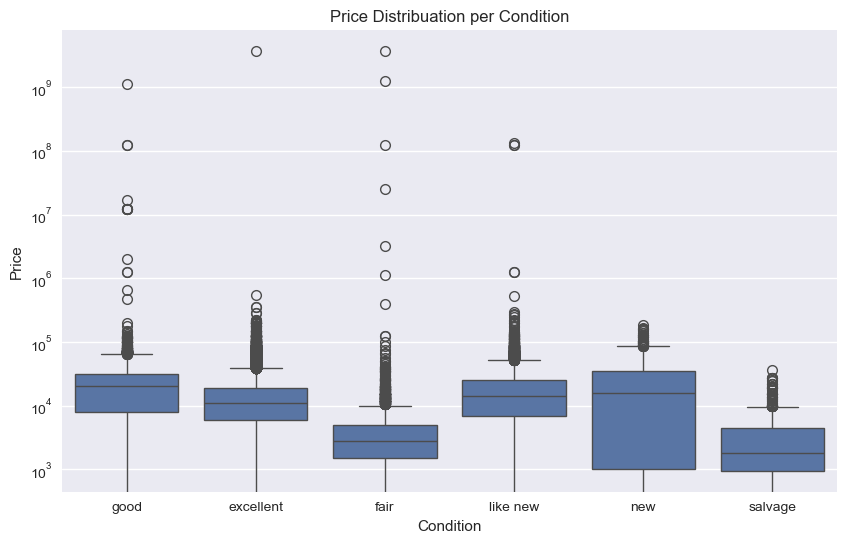

In [44]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='condition', y='price', data=df_temp)
plt.title('Price Distribuation per Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
ax.set_yscale('log')
plt.show()

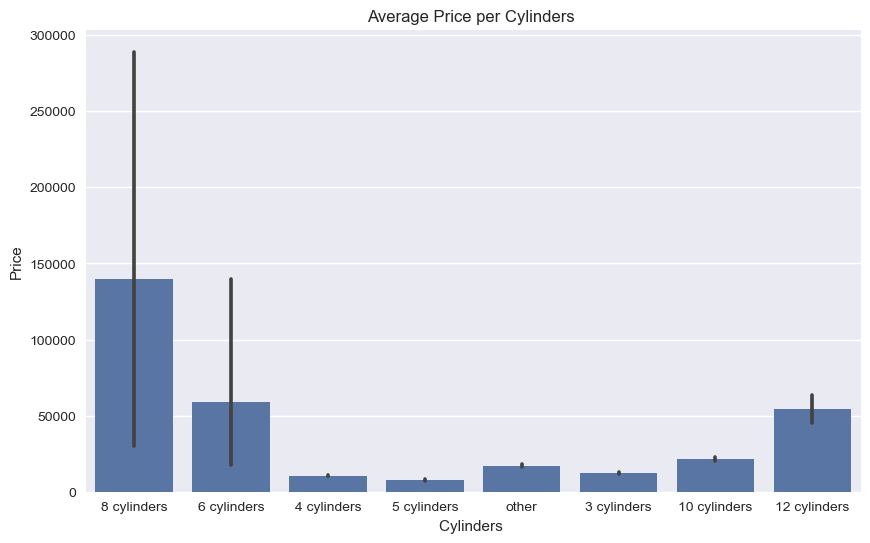

In [45]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cylinders', y='price', data=df_temp)
plt.title('Average Price per Cylinders ')
plt.xlabel('Cylinders ')
plt.ylabel('Price')
plt.show()

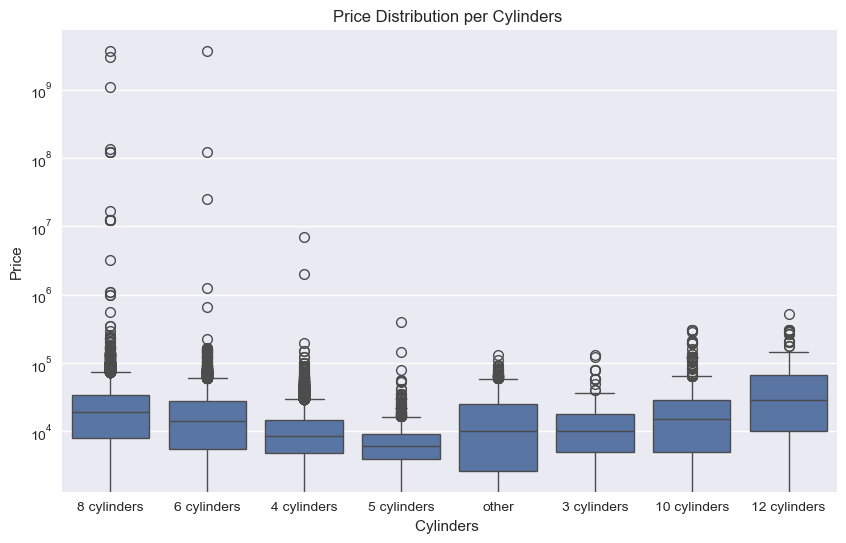

In [46]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='cylinders', y='price', data=df_temp)
plt.title('Price Distribution per Cylinders ')
plt.xlabel('Cylinders ')
plt.ylabel('Price')
ax.set_yscale('log')
plt.show()

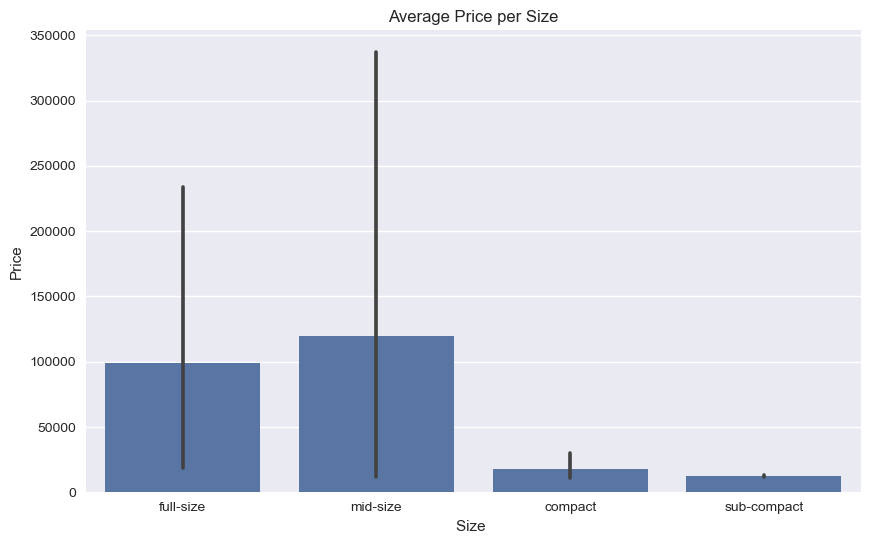

In [47]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='price', data=df_temp)
plt.title('Average Price per Size')
plt.xlabel('Size ')
plt.ylabel('Price')
plt.show()

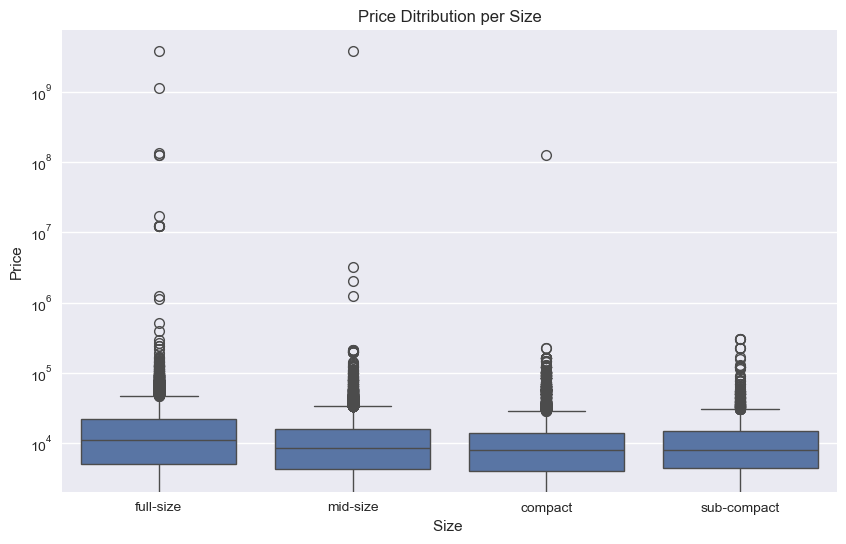

In [48]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='size', y='price', data=df_temp)
plt.title('Price Ditribution per Size')
plt.xlabel('Size ')
plt.ylabel('Price')
ax.set_yscale('log')
plt.show()

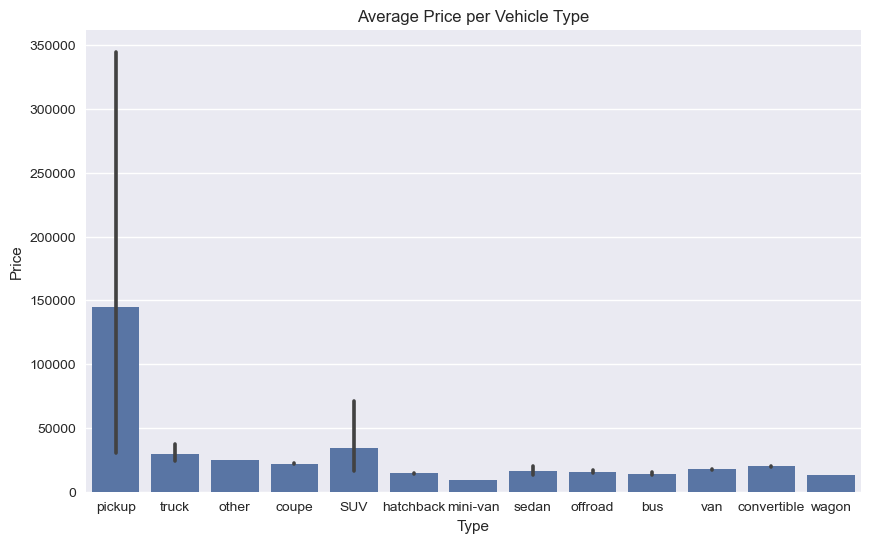

In [49]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='price', data=df_temp)
plt.title('Average Price per Vehicle Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

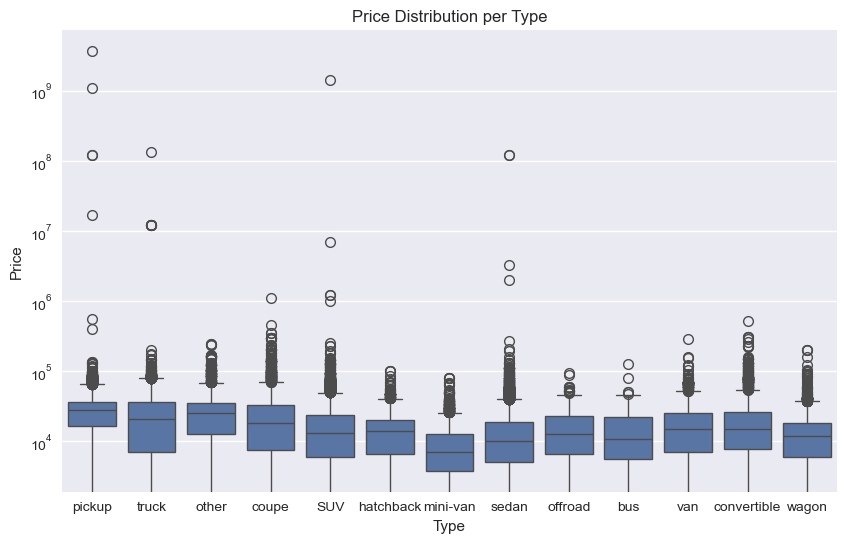

In [50]:
# Box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='type', y='price', data=df_temp)
plt.title('Price Distribution per Type')
plt.xlabel('Type')
plt.ylabel('Price')
ax.set_yscale('log')
plt.show()

In [51]:
# Get min, max, mean, median,  price per fuel type
m4_price_per_fuel = df_temp.groupby(["fuel"])["price"].agg(["min", "max", "mean", "median"]).reset_index()
m4_price_per_fuel.head()

,fuel,min,max,mean,median
0,diesel,0,1410065407,118177.69,27990.00
1,electric,0,130000,24648.36,22544.50
2,gas,0,3736928711,73902.26,11998.00
3,hybrid,0,109999,14582.43,11995.00
4,other,0,1234567890,66811.40,25990.00


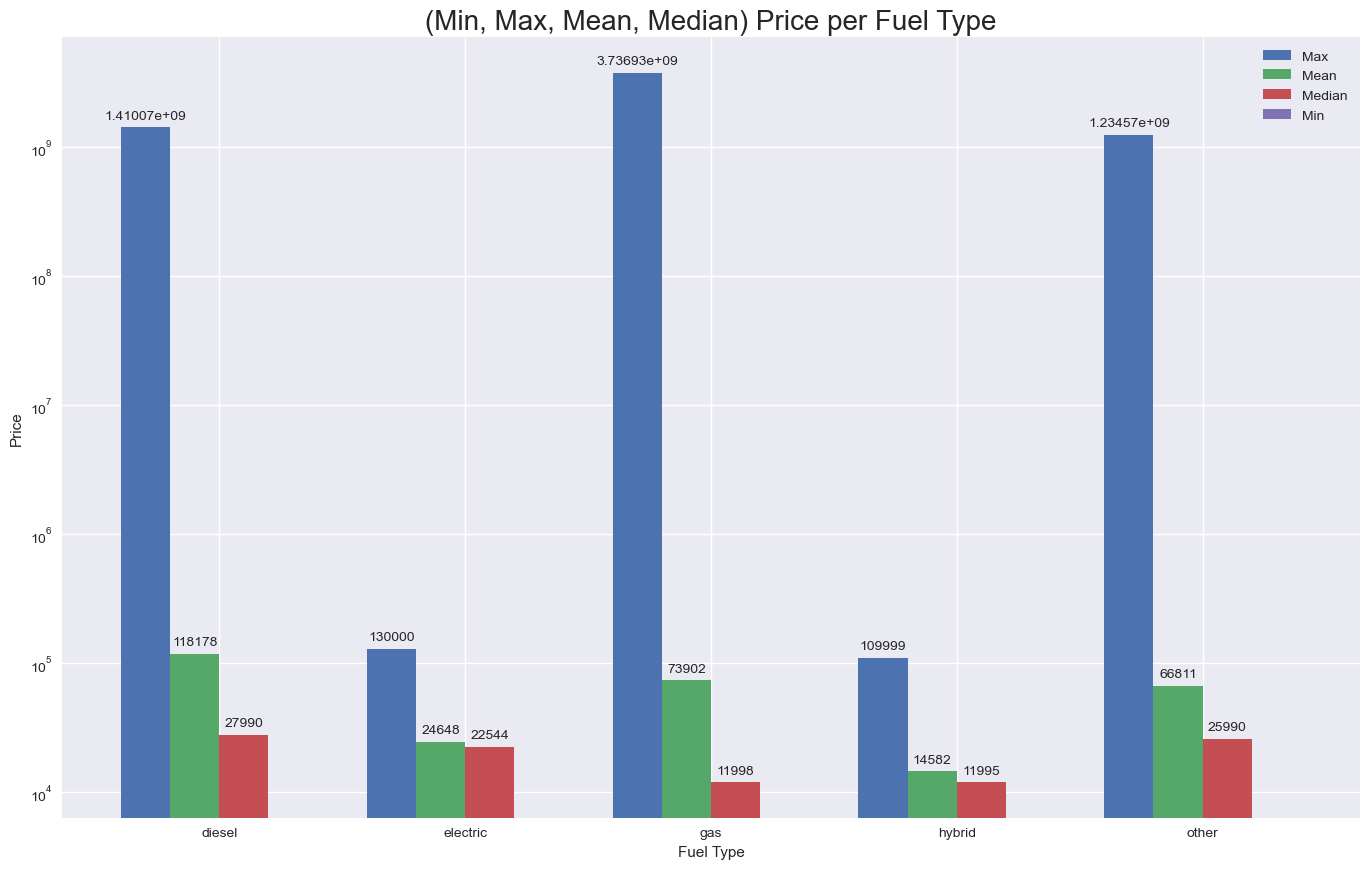

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
x = np.arange(len(m4_price_per_fuel["fuel"]))  # the label locations
width = 0.2

r1 = ax.bar(x - width*1.5, round(m4_price_per_fuel["max"]), width)
r2 = ax.bar(x - width/2, round(m4_price_per_fuel["mean"]), width)
r3 = ax.bar(x+ width/2, round(m4_price_per_fuel["median"]), width)
r4 = ax.bar(x + width*1.5, round(m4_price_per_fuel["min"]), width)

ax.set_xticks(x, m4_price_per_fuel["fuel"])

ax.bar_label(r1, padding=4, fontsize=10)
ax.bar_label(r2, padding=4, fontsize=10)
ax.bar_label(r3, padding=4, fontsize=10)
ax.bar_label(r4, padding=4, fontsize=10)

ax.set_xlabel("Fuel Type")
ax.set_ylabel("Price")
ax.set_yscale('log')
ax.set_title("(Min, Max, Mean, Median) Price per Fuel Type", fontsize=20)

fig.tight_layout()

plt.legend(['Max', 'Mean', 'Median', 'Min']);